# TTT4185 Machine learning for Speech technology

## Voluntary computer assigment 1: Speech analysis

This assignment assumes that the student has knowledge about short-time spectral estimation, linear prediction modeling and cepstral analysis. You should also know the concept of fundamental frequencies and formants.

Useful commands include `matplotlib.pyplot.plot`.

### Problem 1

In this problem we will look at a speech signal and do simple spectral analysis on the signal.



#### (a) Download the speech file `stry.wav` from Blackboard and load the file using `scipy.io.wavefile.read`. The speech represents the latter half of the English word "tapestry". The phonetic transcription is /s/ /t/ /r/ /iy/.
- Plot the signal.
- What is characteristic about the sounds /s/, /t/, /r/ and /iy/?
- Take a 40 millisecond subset of the vowel /iy/ and plot it.
- Find the fundamental frequency $F_0$ of the vowel.

In [81]:
!pip install pysptk
# !conda install --yes numpy

In [82]:
!pip install parabolic

Imports

In [83]:
import scipy.io.wavfile
import scipy.signal as signal
import matplotlib.pyplot as plt
import seaborn as sb
import sounddevice as sd
import numpy as np
import parabolic as pb
from pysptk import sptk


0.464875


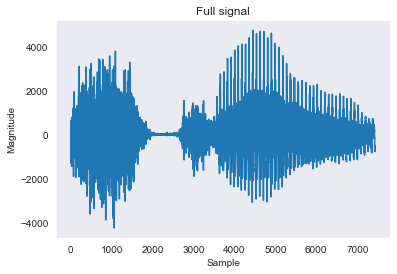

(array([ 43, 133, 222, 312, 406, 493, 576], dtype=int64), {'peak_heights': array([1639., 1455., 1335.,  999.,  831.,  719.,  727.])})


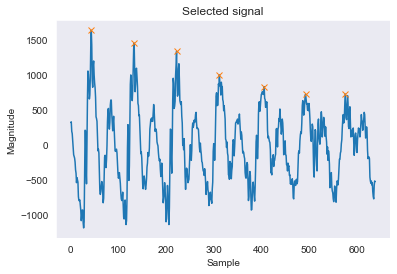

Fundamental frequency: 175.0


In [84]:
Fs, data = scipy.io.wavfile.read('stry.wav')

N = len(data)
t = N/Fs
print(t)
N_vowel_iy = int(Fs*40*10**-3)

vowel_iy = np.array(data[-N_vowel_iy:])
# data_y = data[3400:]

sb.set_style("dark")
plt.title("Full signal")
plt.plot(data)
plt.ylabel("Magnitude")
plt.xlabel("Sample")
plt.show() 

sb.set_style("dark")
plt.title("Selected signal")
plt.plot(vowel_iy)


peaks = signal.find_peaks(vowel_iy, distance=50, height = 0)
print(peaks)
peak_pos = np.arange(0, len(vowel_iy))[peaks[0]]
N_peaks = len(peak_pos)
height = peaks[1]['peak_heights']

# plt.plot(peaks, vowel_iy[peaks], "x")
plt.plot(peak_pos, height, "x")
plt.ylabel("Magnitude")
plt.xlabel("Sample")
plt.show() 


print("Fundamental frequency:", N_peaks/(40*10**-3))

sd.play(np.array(vowel_iy), Fs)
sd.wait()
# sd.play(np.array(data), Fs)
# sd.wait()
sd.stop()


#### (b) Spectral analysis
- Estimate the spectrum of the vowel using an FFT of length 1024. Plot the log-spectrum as a function of frequency
- Multiply the signal by a Hamming window and repeat the last operation.
- Explain the difference between the two spectra.
- Estimate the fundamental frequency $F_0$ using the spectrum, and compare the result to what you got in 1a)
- Roughly estimate the two first formant frequencies.

Useful Python functions: `numpy.fft.fft`, `numpy.abs`, `scipy.signal.hamming`.

##### Estimate log spectrum

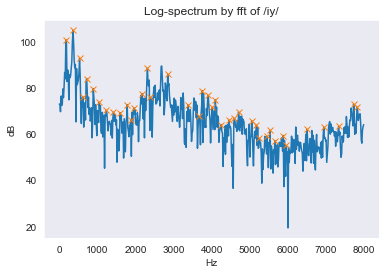

Fundamental frequency from spectrum 171.875


In [85]:
fft_length = 1024

vowel_iy_fft = np.abs(scipy.fft.fft(vowel_iy, n=fft_length, axis=0, workers=-1))[:int(fft_length/2)]
vowel_iy_fft_log = 20*np.log10(vowel_iy_fft)
vowel_iy_fftfreq = scipy.fft.fftfreq(n=fft_length, d=1/Fs)[:int(fft_length/2)]

plt.title("Log-spectrum by fft of /iy/")
plt.ylabel("dB")
plt.xlabel("Hz")
plt.plot(vowel_iy_fftfreq, (vowel_iy_fft_log))
peaks = signal.find_peaks(vowel_iy_fft_log, distance=5, height = 40, width=2, threshold=1)
# print(peaks)
peak_pos = vowel_iy_fftfreq[peaks[0]]
height = peaks[1]['peak_heights']

plt.plot(peak_pos, height, "x")

plt.show()

print("Fundamental frequency from spectrum", peak_pos[0])



##### Using Hamming window

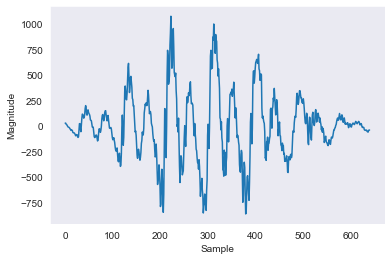

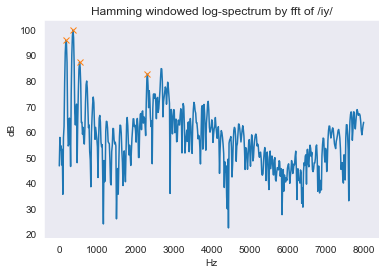

Fundamental frequency from spectrum with hamming window 171.875


In [86]:
# Now using hamming window 


vowel_iy_hamming = vowel_iy*signal.windows.hamming(N_vowel_iy)
plt.plot(vowel_iy_hamming)
plt.ylabel("Magnitude")
plt.xlabel("Sample")
plt.show()

vowel_iy_hamming_fft = np.abs(scipy.fft.fft(vowel_iy_hamming, n=fft_length, axis=0, workers=-1))[:int(fft_length/2)]
vowel_iy_hamming_fft_log = 20*np.log10(vowel_iy_hamming_fft)
plt.plot(vowel_iy_fftfreq, vowel_iy_hamming_fft_log)


peaks = signal.find_peaks(vowel_iy_hamming_fft_log, height = 80, distance=2, threshold=0.8)
peak_pos = vowel_iy_fftfreq[peaks[0]]
height = peaks[1]['peak_heights']
plt.plot(peak_pos, height, "x")

plt.title("Hamming windowed log-spectrum by fft of /iy/")
plt.ylabel("dB")
plt.xlabel("Hz")

plt.show()
F_0=peak_pos[0]

print("Fundamental frequency from spectrum with hamming window", F_0)

##### Explainion of the difference between hamming window and no hamming window

 When "cropping" out a segment of a signal, effectively using an square window, new frequency components are generated at the ends causing spectral leakage which can be seen as noise in the specter. By using using a window like hamming, we mittigate the effect of these unwanted frequency components. 

##### Estimate first two formants


In [87]:
F_1 = peak_pos[1]
F_2 = peak_pos[2]

print(f"The first formant frequency is {F_1} and the second formant frequency it {F_2}")

The first formant frequency is 359.375 and the second formant frequency it 531.25


In [88]:
# fft_length_low=256
# vowel_iy_hamming_fft_low = np.abs(scipy.fft.fft(vowel_iy_hamming, n=fft_length_low))[:int(fft_length_low/2)]
# vowel_iy_hamming_fft_low_log = 20*np.log10(vowel_iy_hamming_fft_low)
# vowel_iy_fftfreq_low = (scipy.fft.fftfreq(n=fft_length_low, d=1/Fs))[:int(fft_length_low/2)]


# plt.plot(vowel_iy_fftfreq_low, vowel_iy_hamming_fft_low_log)

# peaks = signal.find_peaks(vowel_iy_hamming_fft_low_log, distance=5, height = 50, threshold=2)
# peak_pos = vowel_iy_fftfreq_low[peaks[0]]
# height = peaks[1]['peak_heights']
# plt.plot(peak_pos, height, "x")

# plt.title("Hamming windowed 40ms of /iy/ fft plot at fft length 256")
# plt.ylabel("dB")
# plt.xlabel("Hz")

# plt.show()
# print("Fundamental frequency from spectrum with hamming window", peak_pos[0])

In [89]:
# def auto_corr(x):
#     return signal.correlate(x, x, mode="full")

# print(len(vowel_iy_fftfreq))

# plt.plot(vowel_iy_fftfreq, auto_corr(vowel_iy_hamming_fft)[-512:])
# plt.ylabel("dB")
# plt.xlabel("Hz")
# plt.show()


In [90]:
# plt.xcorr(vowel_iy_hamming_fft, vowel_iy_hamming_fft)

# plt.show()

#### (c) AR modeling
- Compute the coefficients of an AR model (linear prediction coefficients) with order 4, 8, 16 and 50, based on the vowel.
- Estimate the spectrum for each of the model orders. Plot the log-spectrum as a function of frequency.
- Compare your results with the spectrum from 1b). Which model order yields the "best" spectral envelope? What happens if the model order is too high or too low?
- Why is it impossible to estimate the fundamental frequency based on the LP model?

Useful Python functions: `pysptk.sptk.lpc`, `scipy.signal.freqz`.

##### AR moddelling and plot

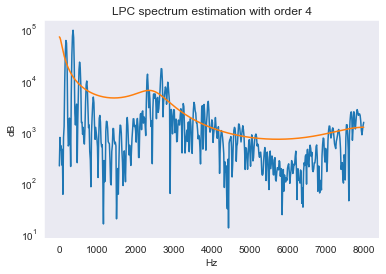

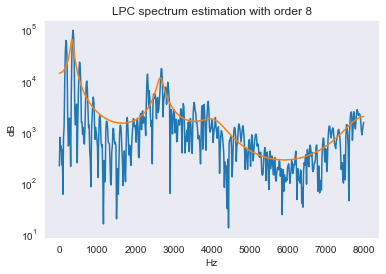

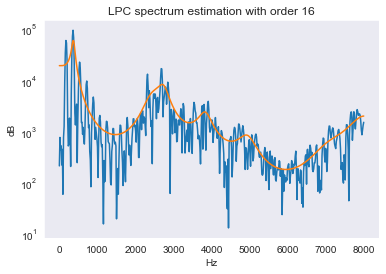

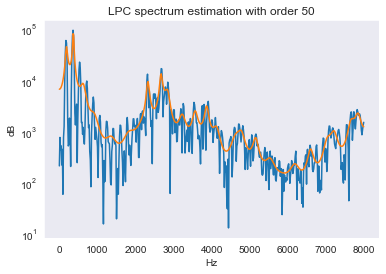

In [91]:
for order in [4, 8, 16, 50]:
    plt.title("LPC spectrum estimation with order "+str(order))
    lpc = sptk.lpc(vowel_iy_hamming, order)

    lpc_coeff= lpc[1:]
    a= [1.]
    b = np.concatenate(([1.], lpc_coeff), axis=0)
    G = lpc[0]

    w1, h1 = signal.freqz([G], b, worN=512, fs=Fs)

    plt.semilogy(vowel_iy_fftfreq, vowel_iy_hamming_fft )
    plt.semilogy(w1, (np.abs(h1)))
    plt.xlabel("Hz")
    plt.ylabel("dB")
    plt.show()

##### Discussion

The spectral estimation with order 16 could be seen as the best spectral envelope as it does not leave out any of the formants. Higher orders will give diminishing returns of information as it does not include any more usefull information. 

It is impossible to modell of estimate the fundamental frequency as the lpc modell does only modell the filter, not the signal. 

In [92]:
# pplot(sp, pysptk.mgc2sp(mgc, 0.0, -1.0, frame_length).real, title="LPC cepstrum based envelope")


# lsp = sptk.lpc2lsp(lpc, otype=0, fs=Fs)
# tmp = 20*np.log(sptk.lsp2sp(lsp, fftlen = fft_length, loggain=False, fs=Fs, itype=0))[:int(fft_length/2)]

#### (d) Use `scipy.signal.spectrogram` to create a spectrogram of the entire speech signal. Try to generate both wide- and narrow-band spectrograms by adjutinf the window lengths and overlaps. Which characteristic traits of the speech sounds /s/, /t/, /r/ and /iy/ can you see from the spectrogram?

##### Plot of spectrograms

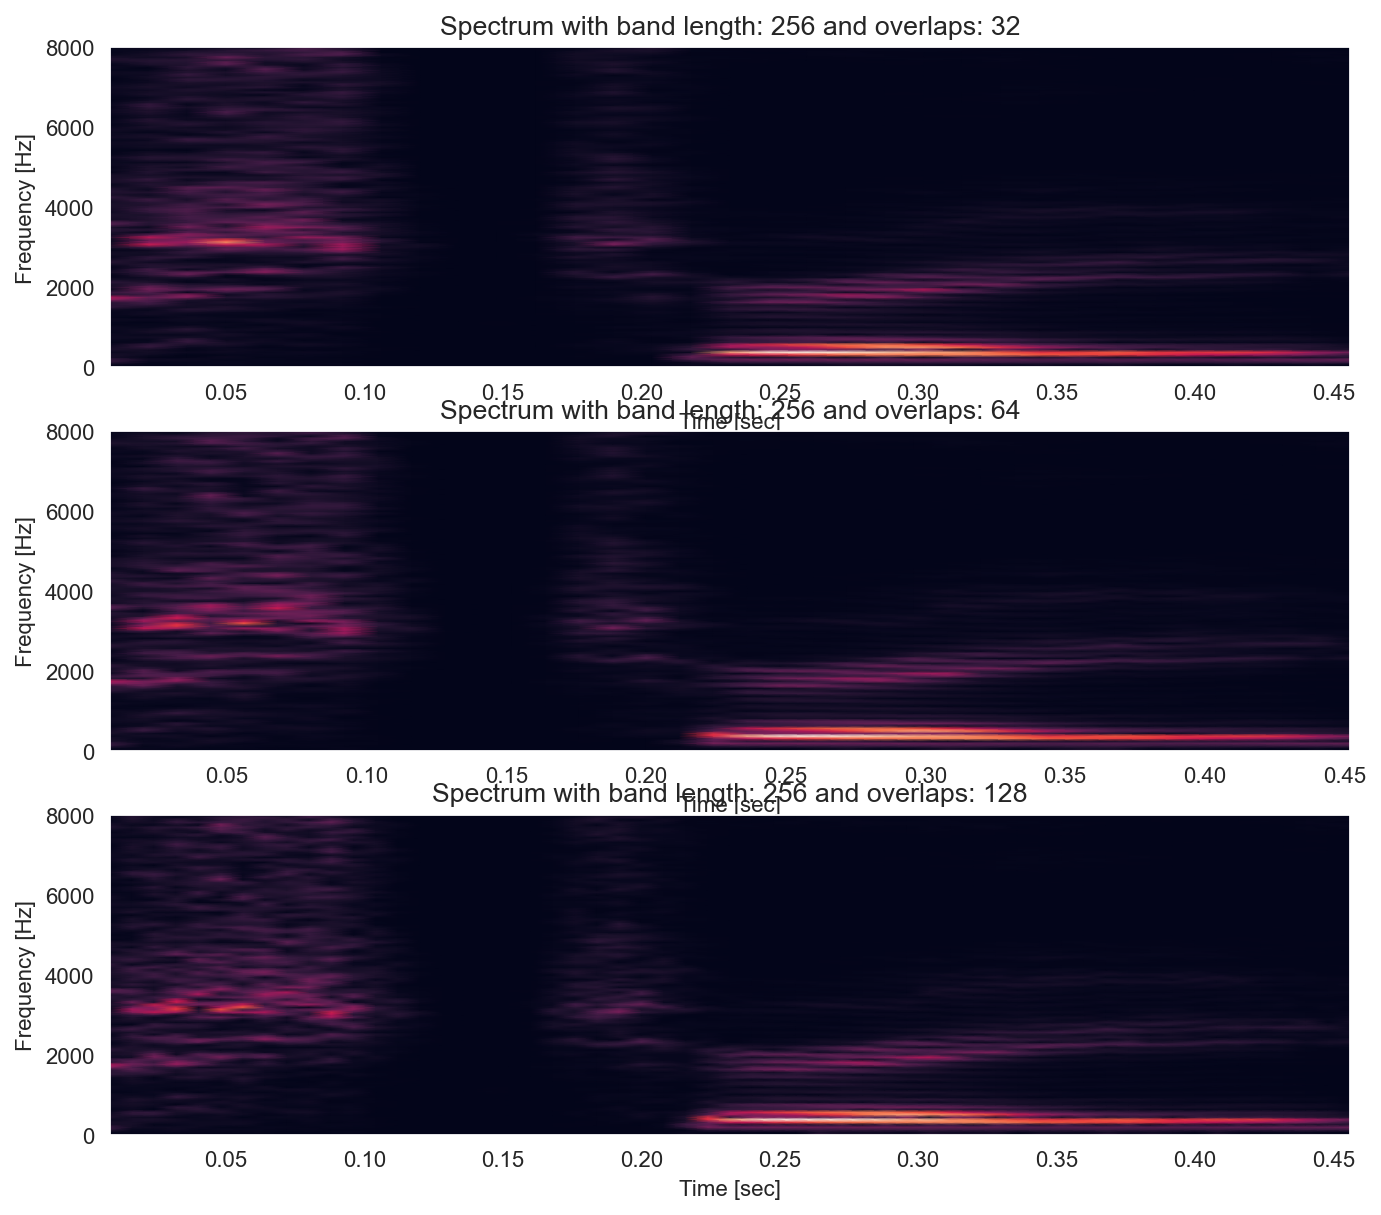

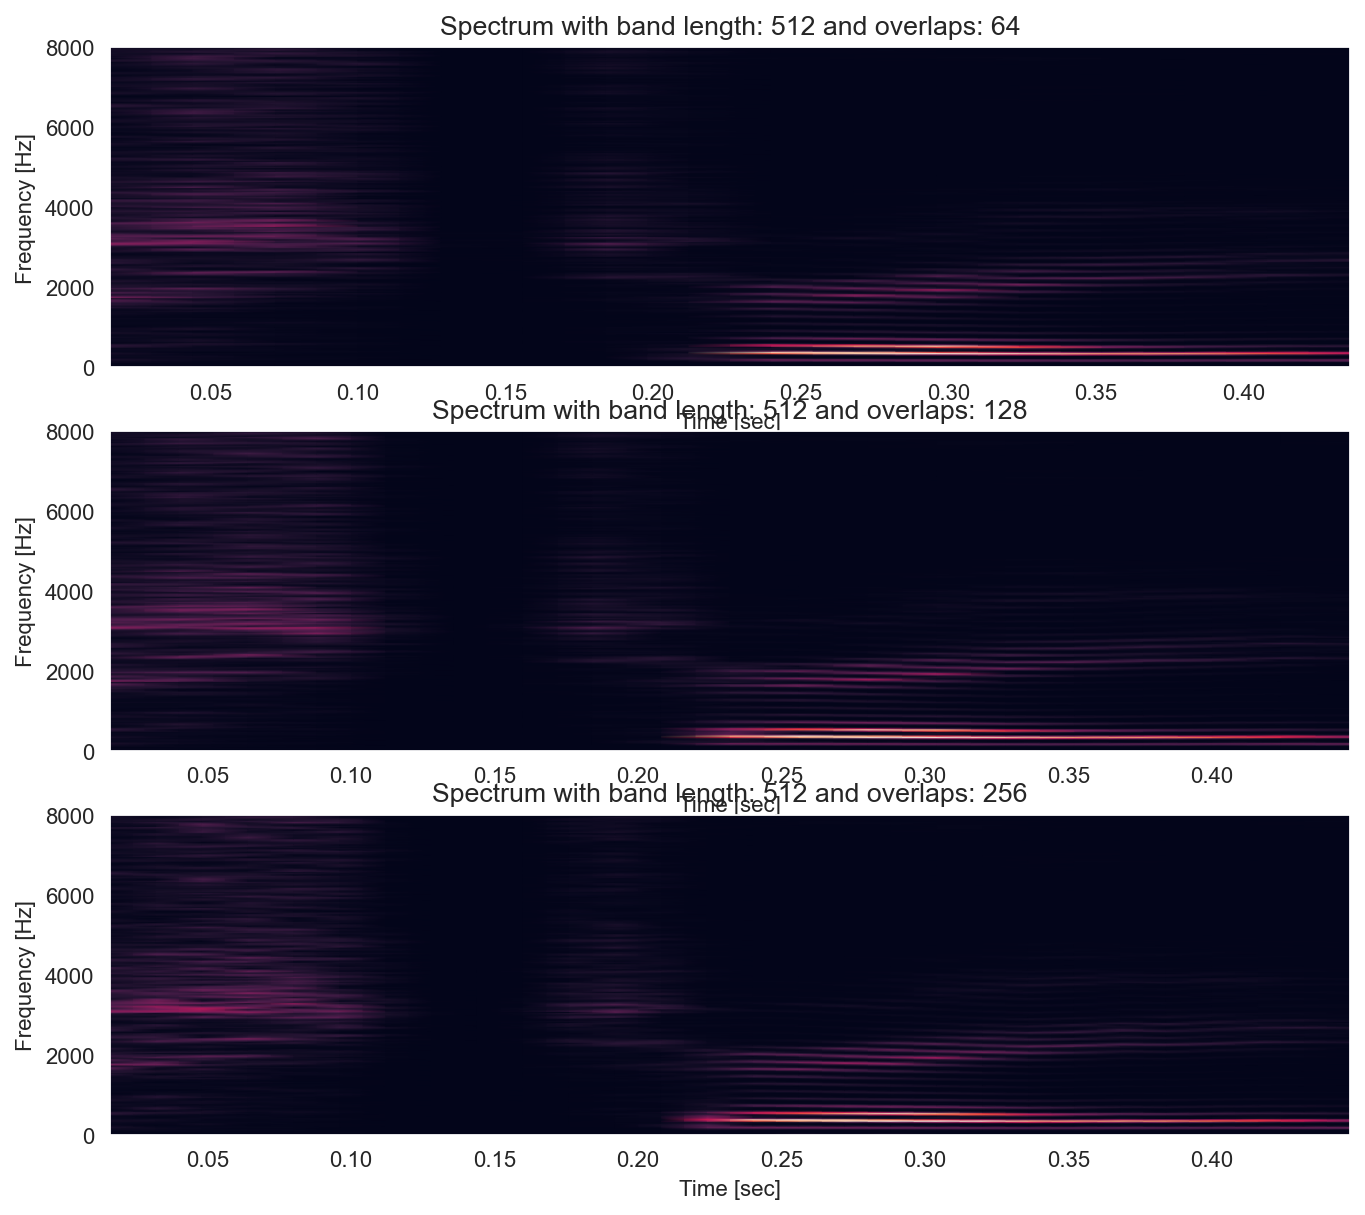

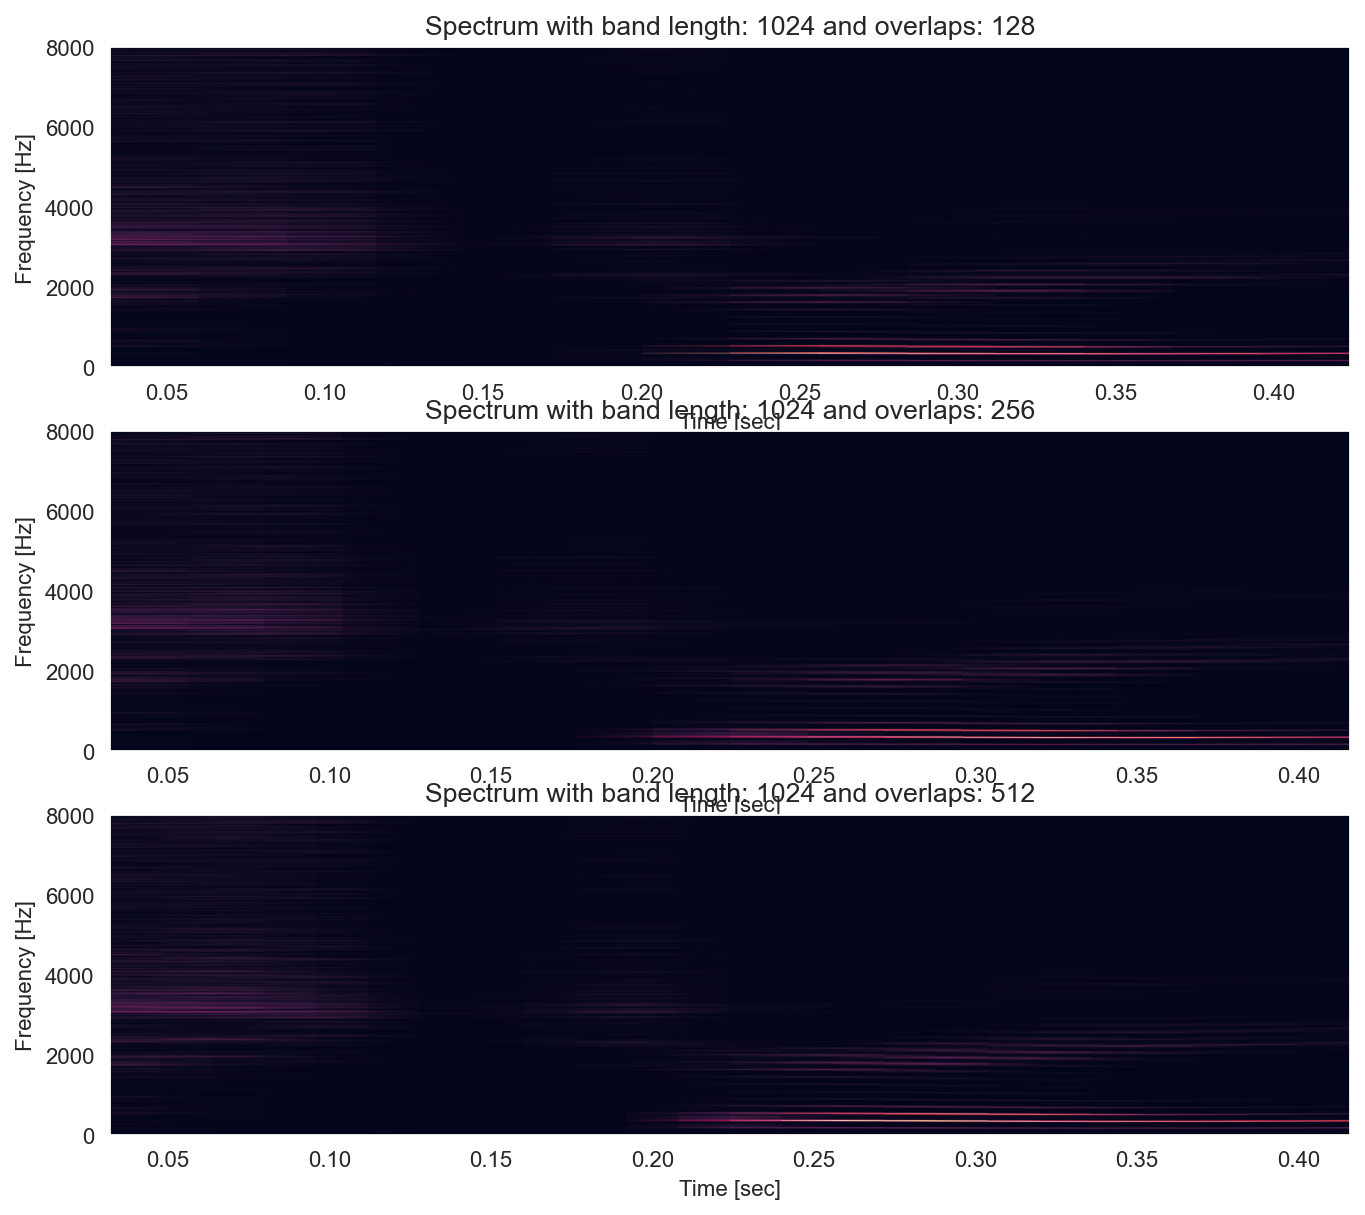

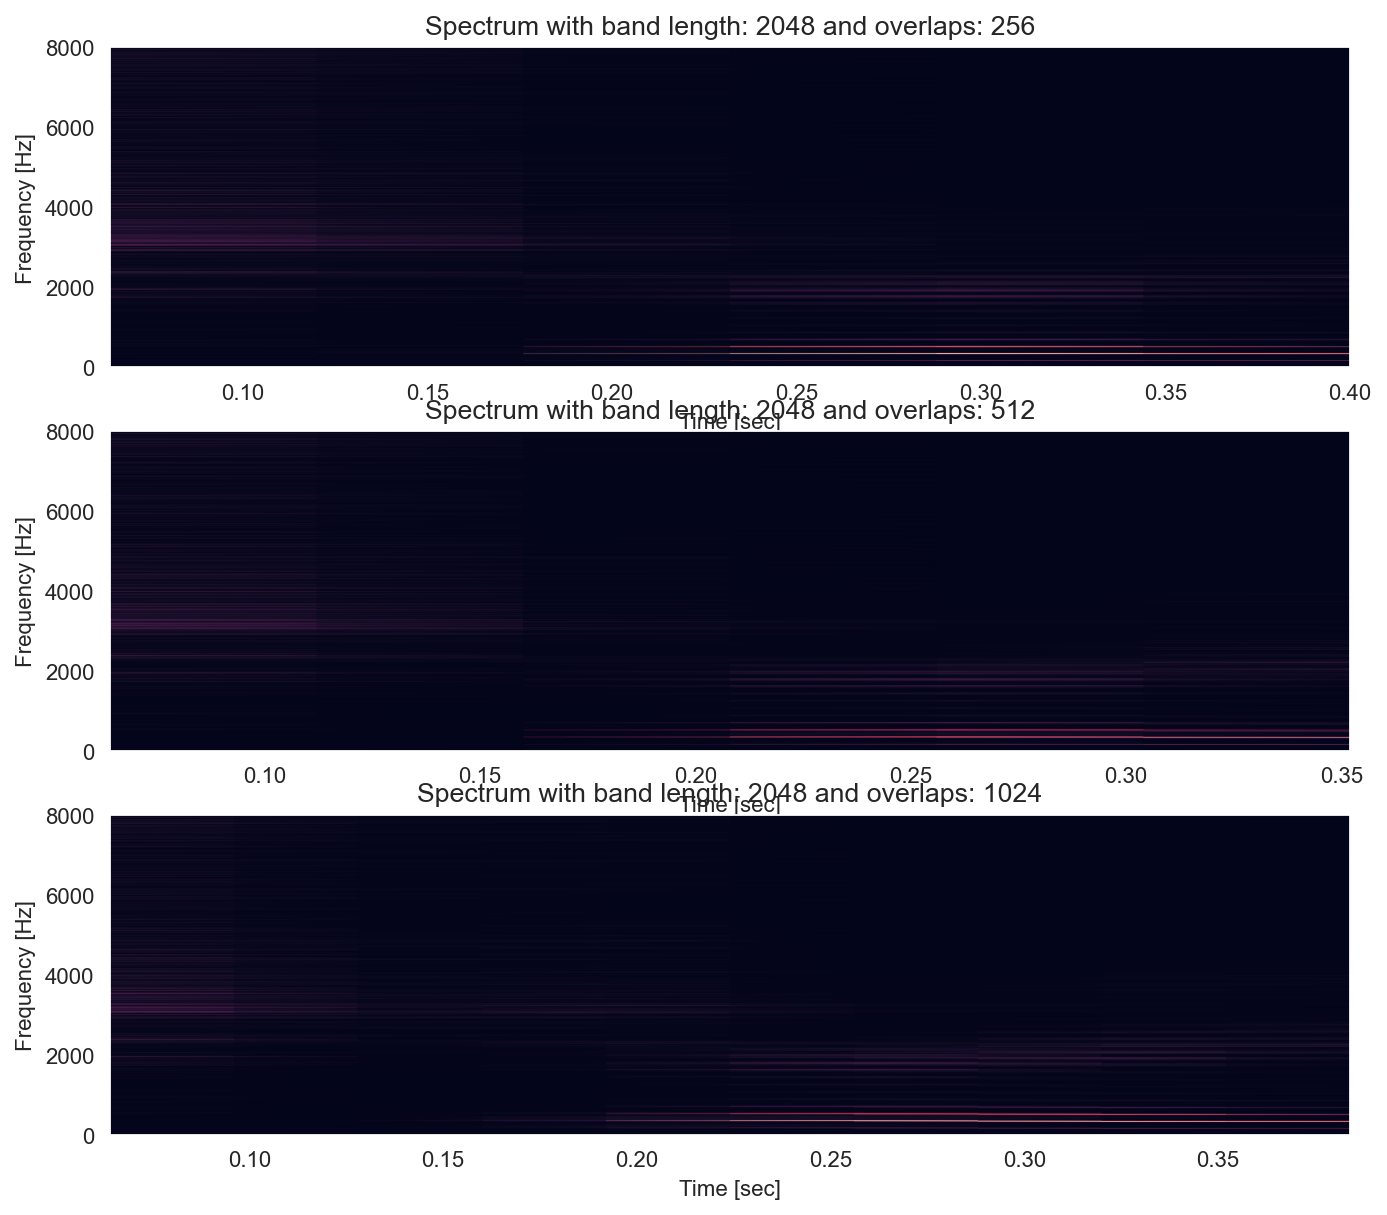

In [93]:


for band_length in [256, 512, 1024, 2048]:
    i = 1
    plt.figure(figsize=(10, 9),dpi=160)
    for num_overlap in [band_length // 8, band_length // 4, band_length // 2]:
        
        plt.subplot(3, 1, i, ymargin=100)
        plt.title(f"Spectrum with band length: {band_length} and overlaps: {num_overlap}")
        plt.ylabel('Frequency [Hz]')
        plt.xlabel('Time [sec]')

        f, t, spec = signal.spectrogram(data,
                                        fs=Fs,
                                        window=signal.hamming(band_length),
                                        nperseg=band_length,
                                        scaling="density",
                                        mode="magnitude",
                                        noverlap=num_overlap)
        plt.pcolormesh(t, f, spec, shading='gouraud')

        # plt.specgram(data, NFFT=band_length, Fs=Fs, scale="dB", noverlap=num_overlap)
        i += 1

    plt.show()


##### Which characteristic traits of the speech sounds /s/, /t/, /r/ and /iy/ can you see from the spectrogram?



We see that narrower band gives higher clearity of frequency components, while longer band gives higher detail in their change over time.   

* /s/ seems to be composed of a wide range of frequency components, with an consentration around 3.5kHz and pretty long duration.
* /t/ seems have simular frequency center component to /s/, but with much lower intencity, much less spread of frequency components and somewhat shorter in duration.
* /r/ seems again to have simular frequency center component to /s/, with an pronounced compenent in 3.5Khz and a lesser so in 2k. Furthermore, it has lower intencity, much fewer frequency components and much shorter in duration.
* /iy/ shows the most uniqe specter with pronounced frequency components at around 200Hz and 1.8kHz, which both slowly fades away over a long interval. Furthermore, the 1.8kHz component elevates its pich over time to around 2kHz. 

### Problem 2
In this problem we look at the cepstrum and deconvolution

(a) Compute and plot the real cepstrum of the vowel from problem 1a).

320


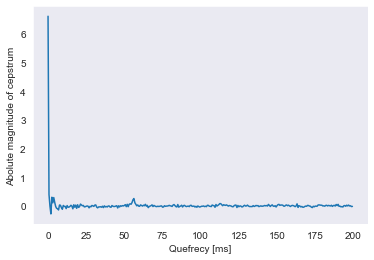

In [94]:
def real_cepstrum(x, n=None):
    ceps = scipy.fft.ifft(np.log(np.abs(scipy.fft.fft(x, n=n))))
    return ceps.real

cepstrum_real_full = real_cepstrum(vowel_iy_hamming, N_vowel_iy)
cepstrum_real = cepstrum_real_full[:N_vowel_iy//2]
quefrecy_ms = np.arange(N_vowel_iy//2) / Fs * 10E3 # in ms

print(len(cepstrum_real))
plt.plot(quefrecy_ms, np.real(cepstrum_real))
plt.ylabel("Abolute magnitude of cepstrum")
plt.xlabel("Quefrecy [ms]")
# plt.xlim(-1, 100)
plt.show()

[ 7.04001449e+00  1.15384768e+00  2.88063781e-01 -3.57538974e-01
  7.93084195e-01  3.22822253e-01  6.30079179e-01  3.34948381e-01
  4.16269650e-02 -4.85435814e-02 -1.09149465e-01 -1.66812978e-01
  9.92758142e-02  9.31299153e-02 -8.13885520e-02 -2.08326699e-01
 -2.40000722e-02 -1.84158772e-02 -1.55619534e-02 -1.27210031e-01
  3.22455236e-03 -5.31642733e-02 -9.20080520e-02 -8.78124259e-03
 -2.14439734e-02 -4.29309200e-02 -1.89197366e-01  2.67670521e-02
 -6.06085514e-02  4.94258807e-02 -1.27657488e-01 -1.00010397e-02
 -1.32825136e-01 -9.55888826e-02  9.23276472e-02  3.54667571e-02
  5.66693841e-03 -1.87422217e-02 -8.96428679e-02 -7.22886650e-02
 -1.23033761e-02  6.12403665e-02 -1.49603235e-02 -2.75120412e-02
 -1.42127385e-03 -3.83630126e-02  4.16178975e-02  6.25607123e-03
 -9.78797207e-03  7.77682018e-02  4.39517750e-02]
51


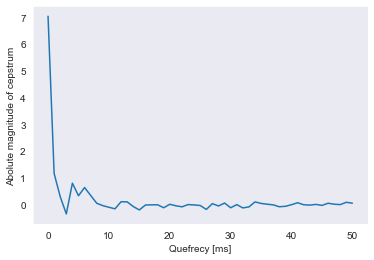

In [95]:
# LPC to cepstrum
cepstrum_from_LPC = sptk.lpc2c(lpc)

print(cepstrum_from_LPC)
print(len(cepstrum_from_LPC))
plt.plot(cepstrum_from_LPC)
plt.ylabel("Abolute magnitude of cepstrum")
plt.xlabel("Quefrecy [ms]")
plt.show()

(b) Use the cepstrum to compute the fundamental frequency $F_0$. Compare your results with those obtained in problem 1).

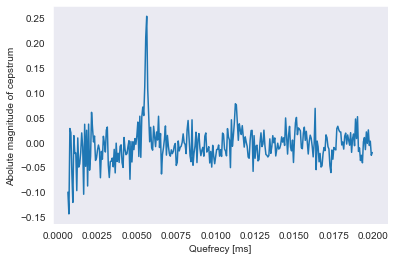

Peek found at:  80
Fundamental frequency is estimated to: 200.0


In [96]:
# peak_pos, peak_height = signal.find_peaks(cepstrum_real, distance=10, height = 0)
# print(peak_pos)
# print(peak_height)
# t = quefrecy_ms[peak_pos[0]]
# print(t)

quefrency = np.arange(len(cepstrum_real))/Fs
plt.plot(quefrency[10:], cepstrum_real[10:])
plt.title("")
plt.ylabel("Abolute magnitude of cepstrum")
plt.xlabel("Quefrecy [ms]")
plt.show() 


peak = np.argmax(cepstrum_real[10:])
print("Peek found at: ", peak)
F0_cept = Fs/peak

print("Fundamental frequency is estimated to:", F0_cept)


(c) In this subproblem you will use the cepstrum to estimate the spectral envelope
- Use liftering to extract the part of the ceptrum that represents the spectral envelope.
- Plot the spectral envelope as a function of frequency, and compare the result with the results from problem 1).

Hint 1: Remember that the cepstrum of a real signal is symmetric, so the liftered signal mus be symmetric as well.

Hint 2: The FFT of a real, symmtric signal is real, but due to round-off errors small imaginary noise may occur. Use `np.real` to get to the real part of the liftered log-spectrum.

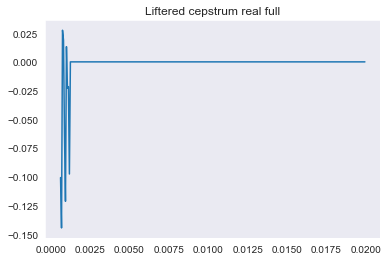

1024


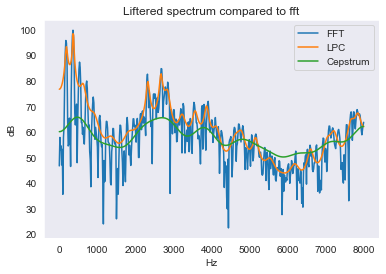

In [97]:
cepstrum_real_full_liftered = cepstrum_real_full

# low liftering
# envelope[:15] = 0 

# high liftering 
cepstrum_real_full_liftered[20:] = 0 

# print(cepstrum_real_full_liftered)
# print(len(cepstrum_real_full_liftered))

plt.plot(quefrency[10:], cepstrum_real_full_liftered[10:len(quefrency)])
# plt.plot(envelope[10:], envelope[10:])
plt.title("Liftered cepstrum real full")
plt.show()

# ------------------- fft spectre ------------------ #
plt.plot(vowel_iy_fftfreq, vowel_iy_hamming_fft_log)

# ----------------- lpc ----------------- #
lpc = sptk.lpc(vowel_iy_hamming, order)

lpc_coeff= lpc[1:]
a= [1.]
b = np.concatenate(([1.], lpc_coeff), axis=0)
G = lpc[0]

w1, h1 = signal.freqz([G], b, worN=512, fs=Fs)

plt.plot(w1, 20*np.log10(np.abs(h1)))


# --------------------------------------- #

liftered_spectrum = np.abs(np.exp(np.fft.fft(cepstrum_real_full_liftered, n=fft_length))).real
# liftered_spectrum = np.real(liftered_spectrum)
print(len(liftered_spectrum))
plt.plot(vowel_iy_fftfreq, 20*np.log10(liftered_spectrum[:fft_length//2]))
plt.title("Liftered spectrum compared to fft")
plt.ylabel("dB")
plt.xlabel("Hz")
plt.legend(["FFT", "LPC", "Cepstrum"])
plt.show()

We see that capstrum can be better at showing the general trend, useful for finding the poles and recognizing patterns in speach signals.